# 1. Carregando os dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/amostra_census.csv',index_col=0)

In [3]:
data

,age,education-num,relationship,race,sex,hour-per-week,income
8521,61.0,6,Not-in-family,Black,Female,24,<=50K
10390,64.0,9,Husband,White,Male,40,<=50K
15854,22.0,10,Own-child,White,Male,98,<=50K
19214,41.0,13,Husband,White,Male,40,>50K
1500,37.0,13,Husband,White,Male,80,>50K
...,...,...,...,...,...,...,...
31502,42.0,11,Husband,White,Male,80,>50K
4994,39.0,13,Husband,White,Male,60,<=50K
26202,46.0,13,Husband,White,Male,60,>50K
12807,39.0,13,Not-in-family,White,Male,40,<=50K


# 2. Split dos dados de treino e de teste

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = data.copy()

In [6]:
# separando features de targets

X = df.drop('income', axis=1)
y = df['income']

In [7]:
# separando os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [8]:
# instâncias por split

print(f'Dados de treino: {X_train.shape[0]}')
print(f'Dados de teste: {X_test.shape[0]}')

Dados de treino: 900
Dados de teste: 100


In [9]:
display(X_train)
display(X_test)

,age,education-num,relationship,race,sex,hour-per-week
13884,70.0,9,Husband,White,Male,60
20463,85.0,9,Not-in-family,White,Female,50
20479,64.0,11,Husband,White,Male,55
14943,31.0,9,Husband,White,Male,65
24376,22.0,13,Not-in-family,Amer-Indian-Eskimo,Female,40
...,...,...,...,...,...,...
31434,39.0,14,Husband,White,Male,45
12250,51.0,9,Husband,White,Male,40
535,39.0,8,Husband,White,Male,50
17772,46.0,9,Husband,White,Male,40


,age,education-num,relationship,race,sex,hour-per-week
19907,23.0,9,Own-child,White,Male,40
23139,22.0,9,Not-in-family,White,Male,27
10390,64.0,9,Husband,White,Male,40
16599,25.0,5,Unmarried,White,Male,40
20679,37.0,9,Husband,White,Male,40
...,...,...,...,...,...,...
10070,28.0,9,Wife,White,Female,40
10764,20.0,10,Own-child,White,Female,20
9264,17.0,8,Own-child,White,Male,12
11390,30.0,10,Unmarried,White,Female,30


# 3. Explorando os dados

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 8521 to 20998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            992 non-null    float64
 1   education-num  1000 non-null   int64  
 2   relationship   1000 non-null   object 
 3   race           1000 non-null   object 
 4   sex            1000 non-null   object 
 5   hour-per-week  1000 non-null   int64  
 6   income         1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 62.5+ KB


In [12]:
# checando dados nulos

df.isna().sum()

age              8
education-num    0
relationship     0
race             0
sex              0
hour-per-week    0
income           0
dtype: int64

In [13]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='income', ylabel='count'>

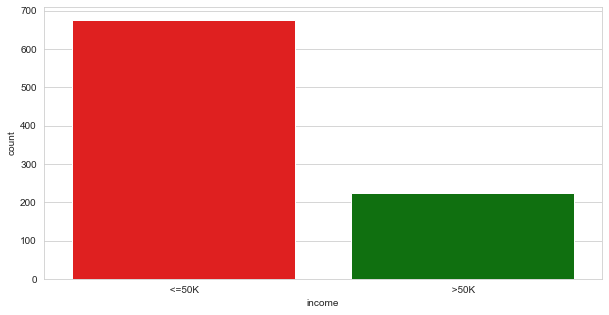

In [14]:
plt.figure(figsize=(10, 5))

sns.countplot(data=X_train.join(y_train), x='income', palette=['r', 'g'])

In [15]:
# checando a porcentagem dos dados

y_train.value_counts(normalize=True)

 <=50K    0.751111
 >50K     0.248889
Name: income, dtype: float64

In [16]:
# separando colunas com dados numéricos

colunas_numericas = X_train.join(
    y_train).select_dtypes(include=['int64', 'float64'])

# separando colunas com dados categóricos

colunas_categoricas = X_train.join(
    y_train).select_dtypes(exclude=['int64', 'float64'])

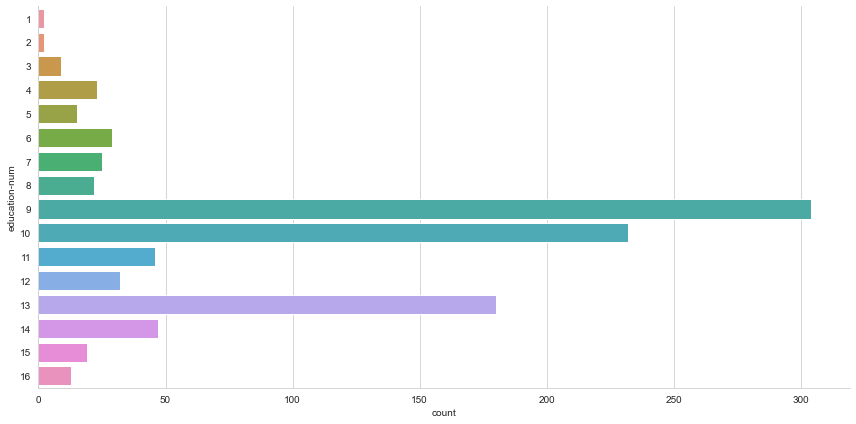

In [17]:
# análise de dados categóricos

sns.catplot(data=df, y='education-num', kind='count',
            height=6, aspect=2, orient='h')

<AxesSubplot: xlabel='relationship', ylabel='count'>

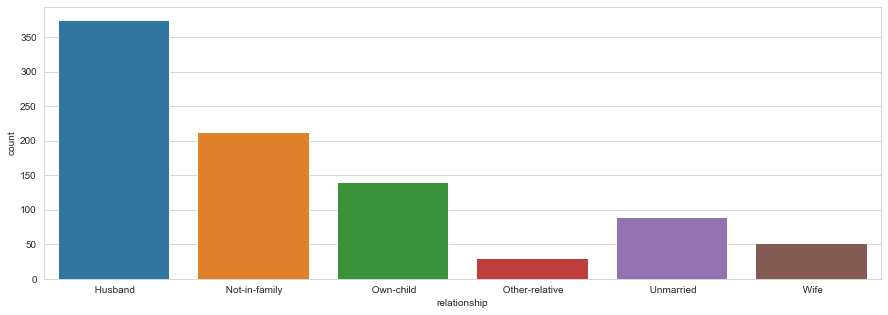

In [18]:
# análise de dados categóricos

plt.figure(figsize=(15, 5))

sns.countplot(data=X_train.join(y_train), x='relationship')

<AxesSubplot: xlabel='race', ylabel='count'>

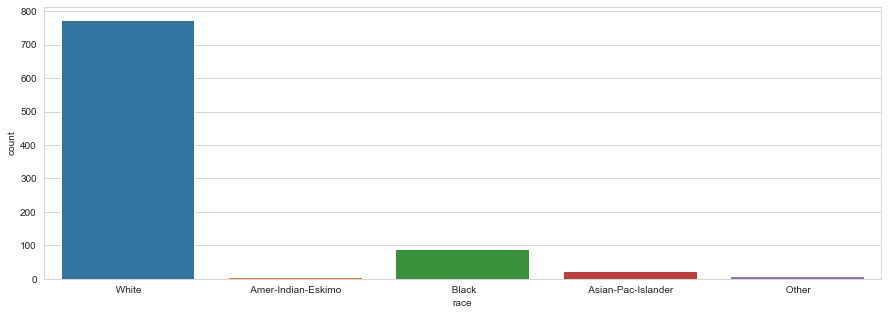

In [19]:
# análise de dados categóricos

plt.figure(figsize=(15, 5))

sns.countplot(data=X_train.join(y_train), x='race')

<AxesSubplot: xlabel='sex', ylabel='count'>

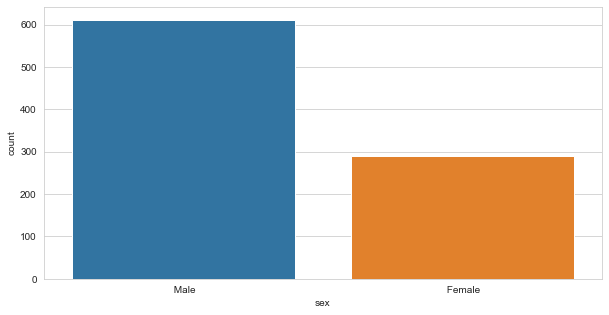

In [20]:
# análise de dados categóricos

plt.figure(figsize=(10, 5))

sns.countplot(data=X_train.join(y_train), x='sex')

# 4. Criação das pipelines

> Importando as bibliotecas necessárias.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

> Checando os dados categóricos para o **encoding**.

In [22]:
colunas_categoricas.columns

Index(['relationship', 'race', 'sex', 'income'], dtype='object')

> Checando os dados numéricos para o **rescale**.

In [23]:
colunas_numericas.columns

Index(['age', 'education-num', 'hour-per-week'], dtype='object')

## Pipeline - Transformação

In [24]:
sim_imp = SimpleImputer(strategy='median')
ohe = OneHotEncoder(sparse_output=False)
min_max = MinMaxScaler()

ct1 = ColumnTransformer(transformers=[('sim_imp', sim_imp, ['age']),
                                      ('ohe', ohe, ['relationship', 'race', 'sex']),
                                      ], remainder='passthrough')

ct2 = ColumnTransformer(transformers=[('min_max', min_max, ['sim_imp__age','remainder__hour-per-week'])], remainder='passthrough')

pipeline = Pipeline([('ct1', ct1), ('ct2', ct2)]).set_output(transform='pandas')

> Observação: para aplicar a pipeline de transformação nos dados de teste, usar `pipeline.transform` (sem o fit).

In [25]:
display(pipeline.fit_transform(X_train))
display(pipeline.transform(X_test))

,min_max__sim_imp__age,min_max__remainder__hour-per-week,remainder__ohe__relationship_ Husband,remainder__ohe__relationship_ Not-in-family,remainder__ohe__relationship_ Other-relative,remainder__ohe__relationship_ Own-child,remainder__ohe__relationship_ Unmarried,remainder__ohe__relationship_ Wife,remainder__ohe__race_ Amer-Indian-Eskimo,remainder__ohe__race_ Asian-Pac-Islander,remainder__ohe__race_ Black,remainder__ohe__race_ Other,remainder__ohe__race_ White,remainder__ohe__sex_ Female,remainder__ohe__sex_ Male,remainder__remainder__education-num
13884,0.726027,0.597938,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
20463,0.931507,0.494845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9
20479,0.643836,0.546392,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11
14943,0.191781,0.649485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
24376,0.068493,0.391753,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31434,0.301370,0.443299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,14
12250,0.465753,0.391753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
535,0.301370,0.494845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8
17772,0.397260,0.391753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9


,min_max__sim_imp__age,min_max__remainder__hour-per-week,remainder__ohe__relationship_ Husband,remainder__ohe__relationship_ Not-in-family,remainder__ohe__relationship_ Other-relative,remainder__ohe__relationship_ Own-child,remainder__ohe__relationship_ Unmarried,remainder__ohe__relationship_ Wife,remainder__ohe__race_ Amer-Indian-Eskimo,remainder__ohe__race_ Asian-Pac-Islander,remainder__ohe__race_ Black,remainder__ohe__race_ Other,remainder__ohe__race_ White,remainder__ohe__sex_ Female,remainder__ohe__sex_ Male,remainder__remainder__education-num
19907,0.082192,0.391753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
23139,0.068493,0.257732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
10390,0.643836,0.391753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
16599,0.109589,0.391753,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
20679,0.273973,0.391753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,0.150685,0.391753,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9
10764,0.041096,0.185567,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10
9264,0.000000,0.103093,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8
11390,0.178082,0.288660,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10


In [26]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Transformando o target

In [27]:
le = LabelEncoder()
le 

LabelEncoder()

In [28]:
y_train = le.fit_transform(y_train)

In [29]:
y_test = le.transform(y_test)

# 5. Treino e performance

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [31]:
def ml_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return pd.DataFrame([{'Model': model_name, 'Accuracy': accuracy, 'Recall': recall,
                          'Precision': precision}], index=[0])

In [32]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=42, min_samples_leaf=25)

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=25,
                       random_state=42)

In [34]:
y_pred = rfc.predict(X_test)

In [35]:
rfc_result = ml_metrics('Random Forest Classifier',y_test, y_pred)
rfc_result

,Model,Accuracy,Recall,Precision
0,Random Forest Classifier,0.77,0.8,0.526316
